>***In linear regression, we tried to understand the relationship between one or more predictor variables and a continuous response variable.***

## What is classification?

Classification is a supervised machine learning problem of predicting which category or class a particular observation belongs to based on its features.

For instance, one popular classification problem is Image classification. We may want to classify images into different classes: dog, cat, donkey, and human.

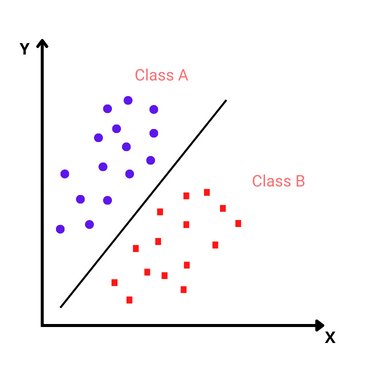

### There are two types of classification problems:

1. Binomial or binary classification: has exactly two classes to choose from.
2. Multinomial or Multiclass classification: has three or more classes to choose from.

### Some examples of classification algorithms:

- Logistic regression
- Decision trees
- Random forest
- Artificial neural networks
- XGBoost

## What is Logistic regression?

Logistic regression is a supervised classification model known as the logit model. It estimates the probability of something occurring, like 'will buy' or 'will not buy,' based on a dataset of independent variables. The outcome should be a categorical or a discrete value. The outcome can be either a 0 and 1, true and false, yes and no, and so on.

The model does not give an exact 0 and 1 but a value between 0 and 1. Unlike linear regression, which fits a regression line, logistic regression fits an 'S'-shaped logistic function(Sigmoid function).

## Logistic function(Sigmoid function)

Since logistic regression is a binary classification technique, the values predicted should fall close to either 0 or 1. This is why a sigmoid function is convenient. In mathematical terms:

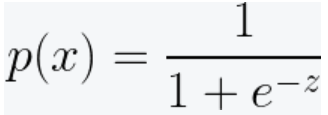

***Where:***

- p(x) is the predicted probability that the output for a given 𝐱 is equal to 1.

- z is the linear function since logistic regression is a linear classifier which translates to:
        
        z = b₀ + b₁x₁ + ... + bᵣxᵣ
        
        Where:
            
            b₀, b₁ ...bᵣ are the model's predicted weights or coefficients.
            
            x the feature values.

>**Note that the z can be defined as the log of the probability of something happening(1 = p(x) = will buy) divided by the probability of something not happening(0 = 1-p(x) = will not buy). For this reason, z is referred to as the log-odds or natural logarithm of odds.**

**The odds mean the probability of success over the probability of failure.**

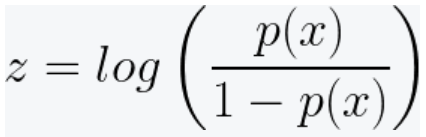

>For example, let's imagine we are trying to build a model to predict the probability of a tumor spreading given its size in centimeters. After plotting the dataset, we can use linear regression to model the status p(x) as a function with the sigmoid function.

**So let's say after fitting the curve, we get the following values:**

    b₀ = -5.47
    b₁ = 1.87

Log-odds would be:

    z = -5.47 + (1.87 x 3)

**Given a tumor size of 3, we can check the probability with the sigmoid function as:**

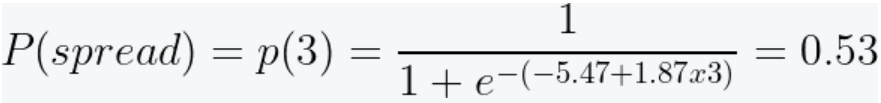

The probability that the tumor of size 3cm spreads is 0.53, equal to 53%.

>**In logistic regression, we use a threshold value that defines the probability of either 0 or 1. For instance, we can set a threshold value of 0.5 where values above the threshold take the value 1, and those below take the value 0. So in our example above, The probability that a tumor of size 3cm will spread takes 1.**

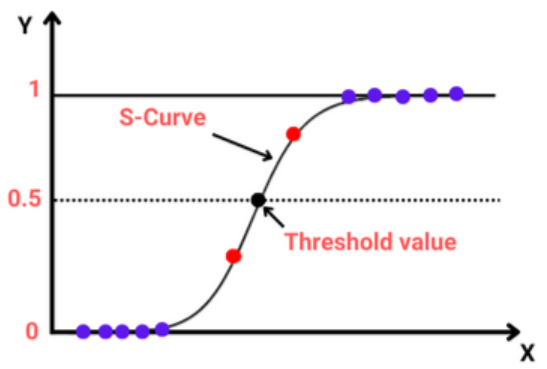

### Maximum Likelihood Estimation(MLE)

We maximize the log-likelihood function (LLF) to get the best coefficients or the predicted weights. This involves finding the best fit sigmoid curve that provides the optimal coefficients, and this method is called Maximum Likelihood Estimation.

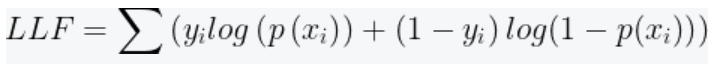

While 𝑦ᵢ = 0, the LLF for that observation is equal to log(1-p(𝐱ᵢ)), and if 𝑝(𝐱ᵢ) is close to 𝑦ᵢ = 0, the log(1-p(𝐱ᵢ)) is close to 0. The main goal is to maximize the LLF. 

So If 𝑝(𝐱ᵢ) is distant from 0, then the log(1-p(𝐱ᵢ)) drops significantly, and that's not what we want.

### Types of logistic regression

So far, we have discussed one type of binary type of logistic regression where the outcome is a 0/1, True/False, and so on. There are two more types:

- Multinomial logistic regression: This type of regression has three or more unordered types of dependent variables, such as cats/dogs/donkeys.
    
- Ordinal logistic regression: Has three or more ordered dependent variables such as poor/average/ good or high/medium/average.

### Assumptions of logistic regression

Logistic regression assumes that:

- The response variable is binary or dichotomous.
- The observations or independent variables have very little or no multicollinearity.
- There are no extreme outliers.
- There is a linear relationship between the predictor variables and the log-odds of the response variable.
- Large sample sizes for a more reliable analysis.

# Logistic regression with Scikit-learn

## Steps for Implementing Logistic Regression

- Import the packages, classes, and functions.
- Load the data.
- Exploratory Data Analysis(EDA).
- Transform the data if necessary.
- Fit the classification model.
- Evaluate the performance model.

## Importing packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## Loading the dataset

- Social Network Ads

In [3]:
social_N_data = pd.read_csv('Social_Network_Ads.csv')
pd.concat([social_N_data.head(), social_N_data.tail()])

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


## Exploratory Data Analysis

Analyzing the data first is key to understanding its characteristics. We will begin with checking the missing values.

In [4]:
social_N_data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

### Check for the total number of those who purchased and those who did not purchase:

<Axes: xlabel='Purchased', ylabel='count'>

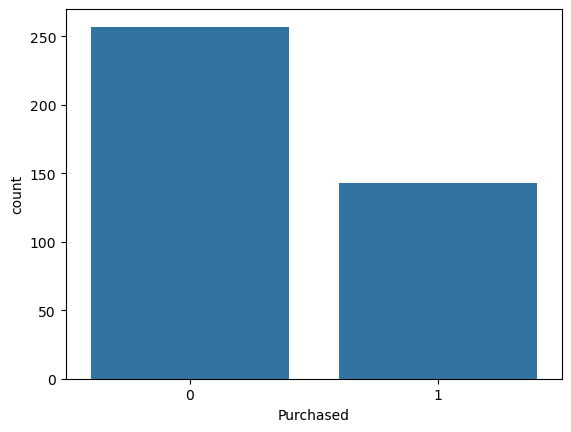

In [5]:
sns.countplot(x='Purchased', data=social_N_data)

**We can also check the age distribution in the dataset:**

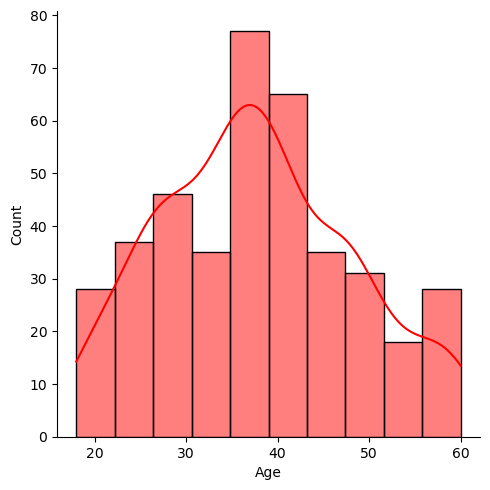

In [6]:
sns.displot(x='Age', data=social_N_data, color='red', kde=True)

### Cleaning the data

We will use the Gender, Age, and EstimatedSalary columns from the dataset for the logistic regression. This means that we do not require the UserID column. Thus we will drop it.

In [7]:
social_N_data.drop('User ID', axis=1, inplace=True)
social_N_data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


### Changing categorical data into dummies

Let's look at the info of the dataset to get a general idea of what it contains.

In [8]:
social_N_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [9]:
gender = pd.get_dummies(social_N_data['Gender'], drop_first=True)

In [10]:
social_N_data.drop('Gender',axis=1,inplace=True)

In [11]:
social_N_data = pd.concat([social_N_data,gender], axis=1)

In [12]:
social_N_data

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True
...,...,...,...,...
395,46,41000,1,False
396,51,23000,1,True
397,50,20000,1,False
398,36,33000,0,True


### Splitting the data into independent(X) and dependent(y) variables

In [13]:
X = social_N_data.iloc[:,[0,1,3]] # Age, EstimatedSalary and Male
X.head()

,Age,EstimatedSalary,Male
0,19,19000,True
1,35,20000,True
2,26,43000,False
3,27,57000,False
4,19,76000,True


In [14]:
y = social_N_data.iloc[:, 2] # Purchased
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

### Feature scaling

Feature scaling is a method used to normalize the range of independent variables. The method enables the independent variables to be in the same range.

When working with large datasets, scaling plays a significant role in improving the performance of the model.

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

### Splitting the dataset into train and test sets

Split the dataset into training and testing sets using the train_test_split function.

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 3)
(120, 3)
(280,)
(120,)


### Fitting the logistic regression model and predicting test results

In [18]:
from sklearn.linear_model import LogisticRegression

# Building the Model(Classifier)
classifier = LogisticRegression()

# Training the Model(Classifier)
classifier.fit(X_train,y_train)

LogisticRegression()

In [19]:
yPred = classifier.predict(X_test)
yPred[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [21]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : yPred})
result[:15]

,Actual,Predicted
398,0,0
125,0,0
328,1,1
339,1,1
172,0,0
342,0,0
197,0,0
291,1,1
29,0,0
284,0,1


In [19]:
classifier.coef_

array([[2.36839196, 1.42929561, 0.20973787]])

In [22]:
classifier.intercept_ 

array([-1.1352347])

In [23]:
from sklearn.metrics import accuracy_score

print("Accuracy Score Of Classifier is:", accuracy_score(y_test,yPred))

Accuracy Score Of Classifier is: 0.8083333333333333


### Evaluating the model

There are various ways of checking the performance of the model.

### Using predict_proba

It returns the matrix of probabilities that the predicted output is equal to zero or one.

In [32]:
x = classifier.predict_proba(X_test)
y = pd.DataFrame(x, columns=['0','1'])
y['0'] = round(y['0']*100)
y['1'] = round(y['1']*100)
y

,0,1
0,94.0,6.0
1,80.0,20.0
2,33.0,67.0
3,17.0,83.0
4,88.0,12.0
...,...,...
115,76.0,24.0
116,71.0,29.0
117,71.0,29.0
118,99.0,1.0


### Using confusion matrix

From the Scikit-learn metrics module, we import confusion_matrix. The confusion matrix is the number of correct and incorrect predictions column-wise, showing the following values:

- True negatives(TN) in the upper-left position.
- False negatives(FN) in the lower-left position.
- False positives(FP) in the upper-right position.
- True positives(TP) in the lower-right position.

In [22]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[63,  9],
       [14, 34]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

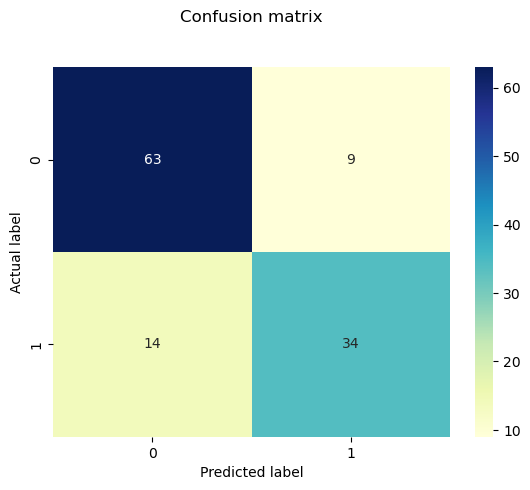

In [23]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

>**To calculate the model's accuracy from the confusion matrix, we divide the sum of TN and TP by the sum of all the predictions.**

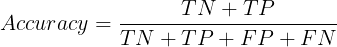

In [1]:
Accuracy = (63 + 34)/(63 + 34 + 9 + 14)
Accuracy

0.8083333333333333

In [24]:
# Also same result from sklearn accuracy_score

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8083333333333333

### Confusion matrix metrics

The classification_report gives a more comprehensive report of the model's performance.

In [25]:
target_names = ['will NOT PURCHASE', 'will PURCHASE']
print(classification_report(y_test, y_pred,target_names=target_names))

                   precision    recall  f1-score   support

will NOT PURCHASE       0.82      0.88      0.85        72
    will PURCHASE       0.79      0.71      0.75        48

         accuracy                           0.81       120
        macro avg       0.80      0.79      0.80       120
     weighted avg       0.81      0.81      0.81       120



### The downsides of the subplot() method for creating subplots are:

- It doesn't create multiple subplots at the same time.
- It deletes the previous plot of the figure.

In the Object-Oriented interface, we'll cover better methods like fig.subplots() to create the subplots.